In [101]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

## some other packages
from scipy import stats
from matplotlib import ticker

In [2]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'lab' : {
        'vmin' : 20, 
        'vmax' : 2000},
    'gul' : {
        'vmin' : 20, 
        'vmax' : 1000},
    'noe' : {
        'vmin' : 10, 
        'vmax' : 1600},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}



reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

In [3]:
def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


## Function to crop the dataset
def Crops(coord, d_set):
    lon1, lon2 = reg_ext[coord]['lon']
    lat1, lat2 = reg_ext[coord]['lat']
    name_fig = reg_ext[coord]['name']

    return(d_set.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2)))


In [31]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
fl_n1 = 'ARMOR_*.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)

In [119]:
#c_armor

In [209]:
##Function to calculate MLD fixed density criterion

def MLD_den_f003(ds):
    delta = 0.03
    h = ds[0]
    d = ds[3]
    
    for i in range(2, len(ds)):
        diff = d[i] - d[1]
        if (diff>delta):
            print(diff, d[i], h[i])
            break

            
##Function to calculate MLD variable density criterion, eq 0.2 Celcius
def MLD_den_v02(ds):
    delta = 0.03
    h = ds[0]
    d = ds[3]
    
    for i in range(2, len(ds)):
        diff = d[i] - d[1]
        if (diff>delta):
            print(diff, d[i], h[i])
            break
        

In [207]:
## Selected points in the regions
### Gulf S: (60W, 35N)
### Lab -I: (50W, 55N)
### Nor E: (17.5W, 52.5N)

gl = Crops('gul', c_armor)
lb = Crops('lab', c_armor)
nr = Crops('noe', c_armor)


p1 = gl.isel(longitude=8, latitude=9)
p2 = lb.isel(longitude=20, latitude=19)
p3 = nr.isel(longitude=8, latitude=9)

f1 = 'G-DTS.csv'
f2 = 'L-DTS.csv'
f3 = 'N-DTS.csv'

<IPython.core.display.Javascript object>


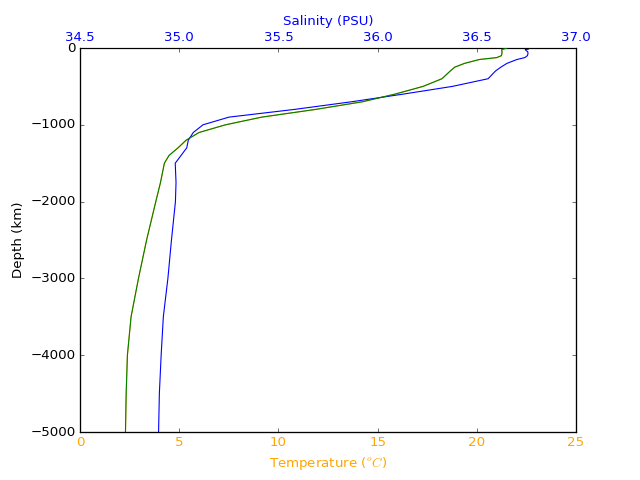

ValueError: could not convert string to float: 'b'

In [211]:
dpt = -p1.depth.values
sal = p1.so[0,:].values
tem = p1.to[0,:].values

g =  pd.read_csv(f1, header=None)

%matplotlib notebook

fig, ax1 = plt.subplots()

color = 'orange'
ax1.set_xlabel('Temperature ($^oC$)', color=color)
ax1.set_ylabel('Depth (km)')
ax1.plot(tem, dpt, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)

ax3 = ax1.twiny()
color = 'green'
ax3.set_xlabel('density ($kg m^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(g[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)

ax1.axhline(106.1001, 'b')
ax2.axhline(106.1001, 'b')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [210]:
MLD_den_f003(g)

print(p1.mlotst[0].values)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<IPython.core.display.Javascript object>


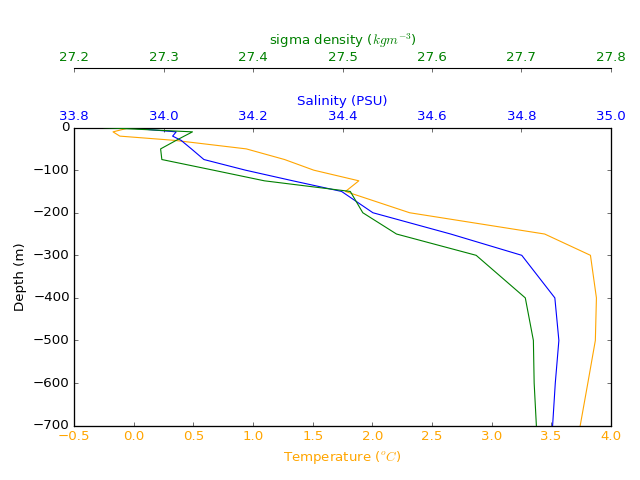

In [118]:
dpt = -p2.depth
sal = p2.so[0,:]
tem = p2.to[0,:]

l =  pd.read_csv(f2, header=None)


%matplotlib notebook
fig, ax1 = plt.subplots()

color = 'orange'
ax1.set_xlabel('Temperature ($^oC$)', color=color)
ax1.set_ylabel('Depth (m)')
ax1.plot(tem, dpt, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)

ax3 = ax1.twiny()
color = 'green'
ax3.set_xlabel('sigma density ($kg m^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(l[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<IPython.core.display.Javascript object>


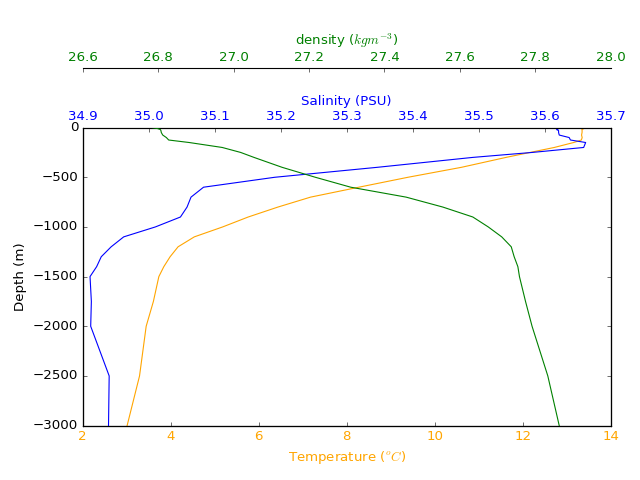

In [116]:
dpt = -p3.depth
sal = p3.so[0,:]
tem = p3.to[0,:]

n =  pd.read_csv(f3, header=None)

%matplotlib notebook
fig, ax1 = plt.subplots()

color = 'orange'
ax1.set_xlabel('Temperature ($^oC$)', color=color)
ax1.set_ylabel('Depth (m)')
ax1.plot(tem, dpt, color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_xlabel('Salinity (PSU)', color=color)  # we already handled the x-label with ax1
ax2.plot(sal, dpt, color=color)
ax2.tick_params(axis='x', labelcolor=color)

ax3 = ax1.twiny()
color = 'green'
ax3.set_xlabel('density ($kg m^{-3}$)', color=color)  # we already handled the x-label with ax1
ax3.plot(n[3], dpt, color=color)
ax3.spines["top"].set_position(("axes", 1.2))
ax3.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()